### Q5 Use wine dataset and perform the following:
1. Implement Pre-processing functions
    - check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Apply Principal component analysis and extract 2 principal components from the dataset. 
3. Plot the scatter plot for the extracted components of wine dataset.
4. Now apply k-means clustering using the value of k=3 (as there are three different wine qualities in the target variable).
5. Form the clusters.
6. Evaluate the quality of clusters formed by k-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/winequality.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data = data.dropna()

X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
from sklearn.preprocessing import LabelEncoder

X['type'] = LabelEncoder().fit_transform(X['type'])

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

pcs = pca.fit_transform(X_scaled)

In [9]:
pca.explained_variance_ratio_.sum() # Capturing 89% of variance

0.8953995673394199

In [10]:
# Helper function to plot 3D graph
def plot_3d_graph(X, cluster_labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50, alpha=0.5, c=cluster_labels, cmap='rainbow')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title)
    plt.show()

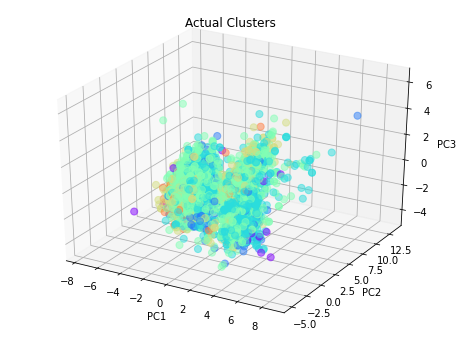

In [11]:
plot_3d_graph(pcs, y, "Actual Clusters") # actual

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    kmeans.fit(pcs)
    wcss.append(kmeans.inertia_)

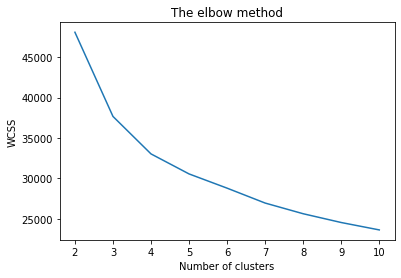

In [13]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Slight Elbow bent formation can be observed at n_cluster=4.

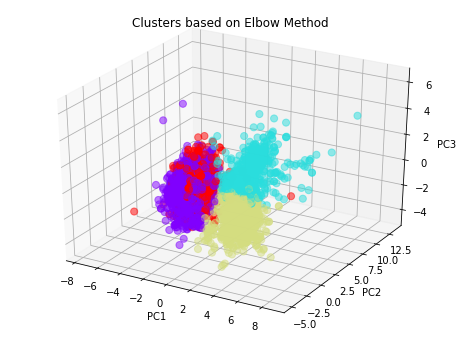

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
predicted_labels = kmeans.fit_predict(pcs)
plot_3d_graph(pcs, predicted_labels, "Clusters based on Elbow Method")

In [15]:
from sklearn.metrics import silhouette_score 

k = range(2,11)
sil_scr = []

for x in k:
    ac = KMeans(n_clusters = x, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    sil_scr.append(silhouette_score(X_scaled, ac.fit_predict(X_scaled)))

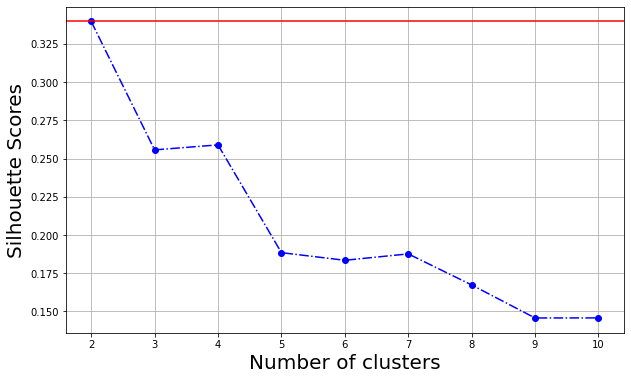

In [16]:
plt.figure(figsize=(10,6))
plt.plot(k, sil_scr, 'bo-.')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Scores', fontsize = 20)
plt.axhline(np.max(sil_scr), color="red")
plt.grid()
plt.show()

### Silhouette score suggests n_clusters=2

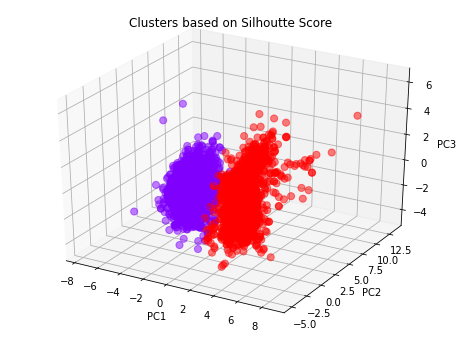

In [17]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
predicted_labels = kmeans.fit_predict(pcs)
plot_3d_graph(pcs, predicted_labels, "Clusters based on Silhoutte Score")

#### Author: Rahul Rajan